In [6]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 393.8 kB/s eta 0:00:01
   -------------------------------------- - 286.7/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.0 MB/s eta 0:00:00


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score  , f1_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [16]:
df = df[["v1",'v2']]

In [18]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
df = df.rename(columns = {
    'v1' : 'label',
    'v2' : 'text'
})

In [22]:
x = df['text']
y = df['label']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 76)

In [26]:
# Value_counts is used to count the numberof unique values in a dataset
distribution = y.value_counts()
distribution

label
ham     4825
spam     747
Name: count, dtype: int64

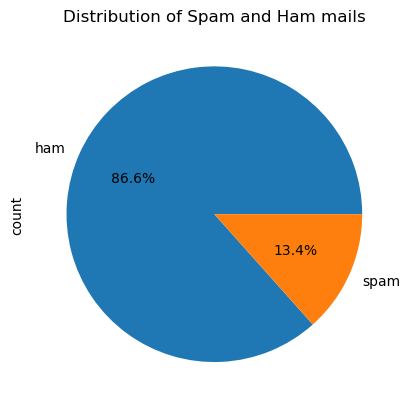

In [28]:
distribution.plot(kind = 'pie', autopct = '%1.1f%%')
plt.title("Distribution of Spam and Ham mails")
plt.show()

In [30]:
# Generate Word Cloud for Spam Mails
spam_text = ''.join(df[df['label'] == 'spam']['text'])
spam_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcvWINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 infoURGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or c

In [66]:
spam_wordcloud = WordCloud(width = 800 , height = 400 , max_words = 100,background_color = "Black",random_state = 42).generate(spam_text)

In [44]:
spam_wordcloud

(-0.5, 799.5, 399.5, -0.5)

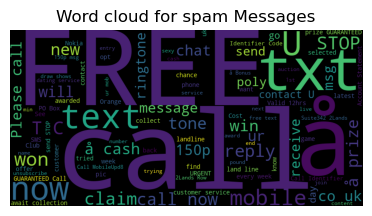

In [68]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(spam_wordcloud)
plt.title("Word cloud for spam Messages")
plt.axis("off")

In [72]:
ham_text = ''.join(df[df['label'] == 'ham']['text'])
ham_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if thatåÕs the way u feel. ThatåÕs the way its gota 

In [74]:
ham_wordcloud = WordCloud(width = 800 , height = 400 , max_words = 100,background_color = "Black",random_state = 42).generate(ham_text)

(-0.5, 799.5, 399.5, -0.5)

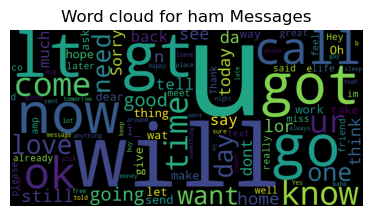

In [76]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.imshow(ham_wordcloud)
plt.title("Word cloud for ham Messages")
plt.axis("off")

In [78]:
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

# CountVectorizer is a text processing technique used in 
# natural language processing task for converting a collection of text document into a numerical representation

In [82]:
# Train a multiple naive bayes classifier

model_multinomial = MultinomialNB(alpha = 0.8 , fit_prior = True,force_alpha = True)
model_multinomial.fit(x_train,y_train)

MultinomialNB(alpha=0.8, force_alpha=True)

In [84]:
# Train a Gaussian Navie Bayes classifier
model_gaussian = GaussianNB()
model_gaussian.fit(x_train.toarray(),y_train)

GaussianNB()

In [86]:
y_pred_multinomial = model_multinomial.predict(x_test)
accuracy_multinomial = accuracy_score(y_test,y_pred_multinomial);
print("Accuracy for multinomial : ", accuracy_multinomial)

Accuracy for multinomial :  0.9811659192825112


In [88]:
y_pred_guass = model_gaussian.predict(x_test.toarray())
accuracy_guass = accuracy_score(y_test,y_pred_guass);
print("Accuracy for guass : ", accuracy_guass)

Accuracy for guass :  0.9031390134529148


<BarContainer object of 2 artists>

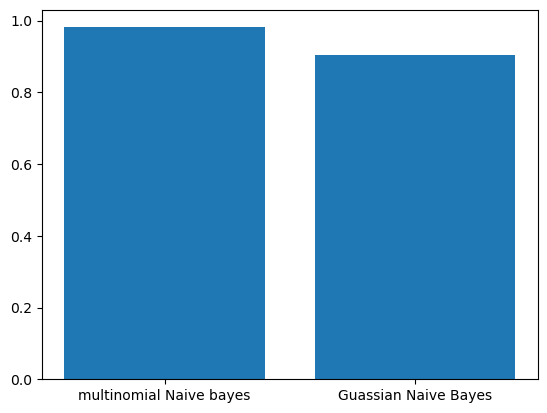

In [94]:
methods = ["multinomial Naive bayes" , "Guassian Naive Bayes"]
scores = [accuracy_multinomial,accuracy_guass]
plt.bar(methods,scores)